# 1

In [5]:
install.packages('tree')
install.packages('mlbench')
install.packages('maptree')

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)



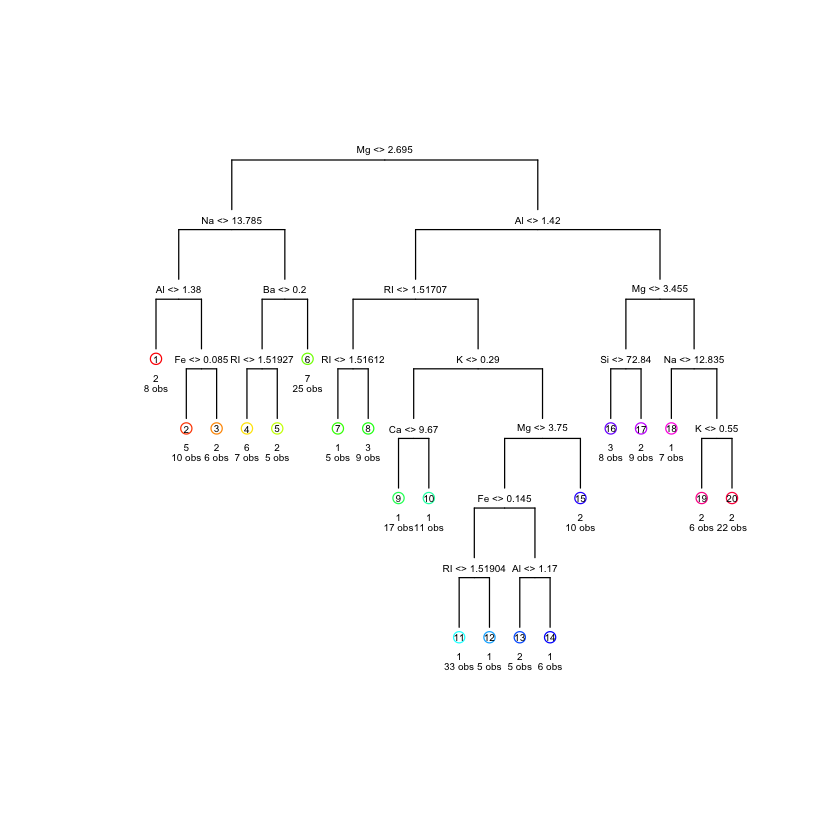

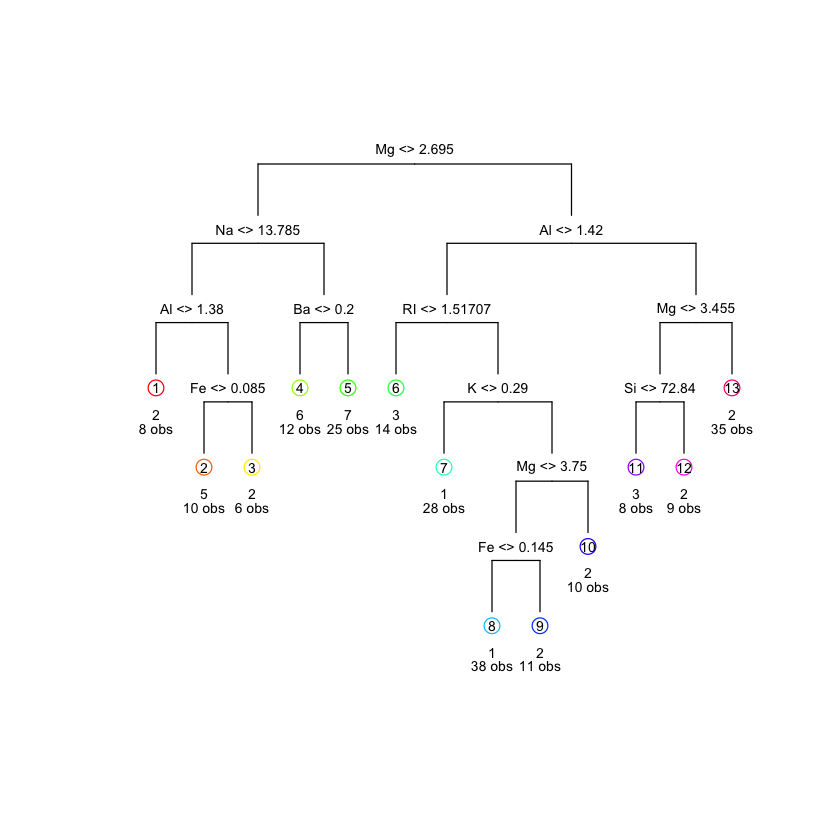

In [10]:
library(tree)
library(maptree)
library(mlbench)
data(Glass)

Glass.tree<- tree(Type ~., Glass)
draw.tree(Glass.tree, cex=0.5)


Glass.pruned_tree <- prune.tree(Glass.tree, k=10)
draw.tree(Glass.pruned_tree, cex=0.7)

# 2

In [9]:
install.packages('DAAG')

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)



[1] 0.8562891
[1] 0.8475958
[1] 0.7897311


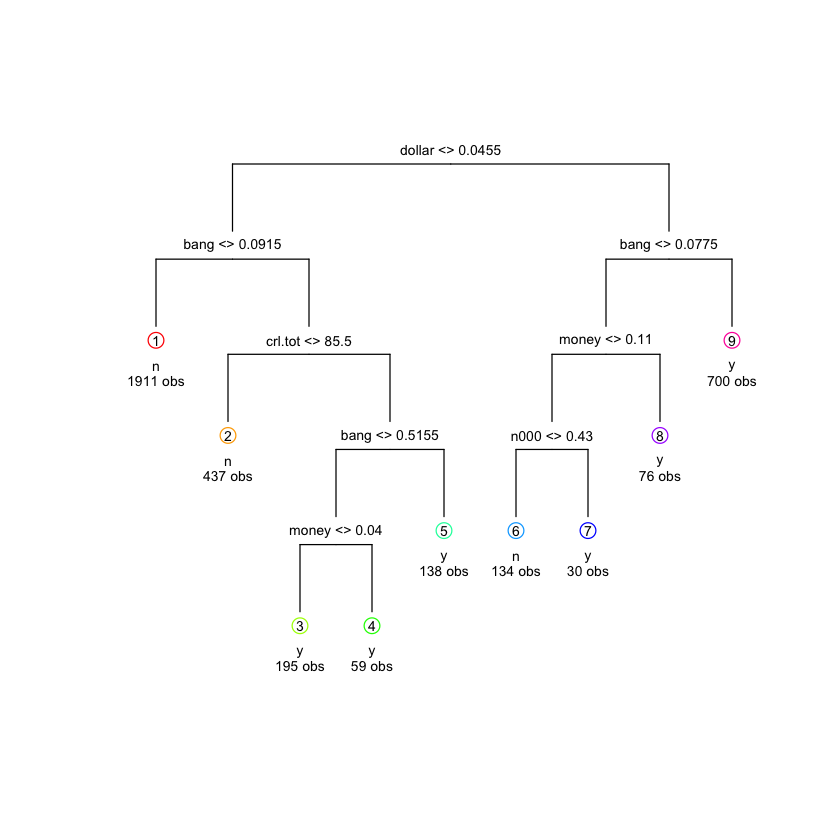

In [56]:
library(DAAG)
data(spam7)

#separate data for train and test
get_train_test <- function(data, persentage) {
    size = dim(data)[1]
    set.seed(12345)
    randomized = data[order(runif(size)), ]
    train_sep = as.integer(size * persentage / 100)
    test_sep = as.integer(size * (1 - persentage / 100))
    list(randomized[1 : train_sep, ], randomized[(test_sep + 1) : size, ])
}

#test the function
separated_data = get_train_test(spam7, 80)
train = separated_data[[1]]
test = separated_data[[2]]

spam7.tree <- tree(yesno ~., train)
draw.tree(spam7.tree, cex = 0.7)

spam7.pruned_tree <- prune.tree(spam7.tree, method = "misclass")

get_prediction <- function(model, data) {
    probabilities <- predict(model, data)
    predictions <- sapply(probabilities[,1], function(prob) if(prob > 0.5) 'n' else 'y')
}
                          
get_score <- function(predicted, real) {
    score = 0
    tmp = sapply(1:length(predicted), function(i) {if(predicted[i] == real[i]) 1 else 0})
    sum(tmp) / length(predicted)
}

predictions <- get_prediction(spam7.tree, test)
score <- get_score(predictions, test$yesno)
                        
for(i in 2:4)
{
  tmp <- prune.tree(spam7.tree, k=spam7.pruned_tree$k[i], method = "misclass")
  png(filename=paste(toString(i),'.jpg'))
  print(get_score(get_prediction(tmp, test), test$yesno))
}

# 3

In [62]:
library(e1071)
library(Metrics)
data(nsw74psid1)

separated_data = get_train_test(nsw74psid1, 80)
train = separated_data[[1]]
test = separated_data[[2]]

tree <- tree(re78 ~., train)
res <- lm(re78 ~ ., data = train)
svm <- svm(re78 ~ . , data = train, type = "eps-regression")
tree_pred <- predict(tree, test)
res_pred <- predict(res, test)
svm_pred <- predict(svm, test)
print('tree')
print(mse(tree_pred, test$re78))
print('regression')
print(mse(res_pred, test$re78))
print('svm')
print(mse(svm_pred, test$re78))


[1] "tree"
[1] 110567068
[1] "regression"
[1] 99817675
[1] "svm"
[1] 94294575


# 4

In [72]:
data <- read.table("Lenses.txt")
data <- data[-1]
data$V6 <- factor(data$V6)
data.tree <- tree(V6~., data)
x <- data.frame('V2'=2, 'V3'=1, 'V4'=2, 'V5'=1)
prediction <- predict(data.tree, x)
print(prediction)

  1 2 3
1 0 0 1


# 5

In [74]:
data(Glass)
data = Glass[-1]

data.tree <- tree(Type ~., data)
x <- data.frame('RI'=1.516, 'Na'=11.7, 'Mg'=1.01, 'Al'=1.19, 'Si'=72.59, 'K'=0.43, 'Ca'=11.44, 'Ba'=0.02, 'Fe'=0.1)
prediction <- predict(data.tree, x)
print(prediction)


  1     2 3 5 6     7
1 0 0.875 0 0 0 0.125


# 6

In [91]:
train <- read.table('svmdata4.txt', stringsAsFactors=TRUE)
test <- read.table('svmdata4test.txt', stringsAsFactors=TRUE)

get_prediction <- function(model, data) {
    probabilities <- predict(model, data)
    predictions <- sapply(probabilities[,1], function(prob) if(prob > 0.5) 'green' else 'red')
}
                          
get_score <- function(predicted, real) {
    score = 0
    tmp = sapply(1:length(predicted), function(i) {if(predicted[i] == real[i]) 1 else 0})
    sum(tmp) / length(predicted)
}

train.tree <- tree(Colors ~., train)
print(get_score(get_prediction(train.tree, test), test$Colors))

[1] 0.9


# 7

In [95]:
train = read.csv("titanic/train.csv", na.strings = c('NA', ''))
test = read.csv("titanic/test.csv", na.strings = c('NA', ''))

train = subset(train, select = -c(PassengerId, Name, Cabin, Embarked, Fare, SibSp, Parch, Ticket))
PassengerId = test$PassengerId
test = subset(test, select = -c(PassengerId, Name, Cabin, Embarked, Fare, SibSp, Parch, Ticket))

update_age <- function(data) {
    median_table = data.frame(male=c(0, 0, 0), female=c(0, 0, 0))
    median_table[1, 'male'] = median(as.numeric(subset(data, Sex=='male' & Pclass==1 & !is.na(Age))$Age))
    median_table[2, 'male'] = median(as.numeric(subset(data, Sex=='male' & Pclass==2 & !is.na(Age))$Age))
    median_table[3, 'male'] = median(as.numeric(subset(data, Sex=='male' & Pclass==3 & !is.na(Age))$Age))
    median_table[1, 'female'] = median(as.numeric(subset(data, Sex=='female' & Pclass==1 & !is.na(Age))$Age))
    median_table[2, 'female'] = median(as.numeric(subset(data, Sex=='female' & Pclass==2 & !is.na(Age))$Age))
    median_table[3, 'female'] = median(as.numeric(subset(data, Sex=='female' & Pclass==3 & !is.na(Age))$Age))
    
    data$Age = apply(data, 1, function(row) {
        new_age = 0

        if (is.na(row['Age'])) {
            new_age = median_table[row['Pclass'], row['Sex']]
        } else {
            new_age = row['Age']
        }
        
        new_age
    })
    
    data$Age = as.numeric(data$Age)
    data
}

train = update_age(train)
test = update_age(test)
train.tree = tree(Survived ~., train)

colSums(is.na(train))
colSums(is.na(test))

predicted = (predict(train.tree, test) > 0.5)
Survived = as.numeric(predicted)
result = data.frame(PassengerId=PassengerId, Survived=Survived)
write.csv(result,'submission.csv', row.names=FALSE)

Warning message in tree(Survived ~ ., train):
“в результате преобразования созданы NA”


Survived   Pclass      Sex      Age 
       0        0        0        0

Pclass    Sex    Age 
     0      0      0

Warning message in pred1.tree(object, tree.matrix(newdata)):
“в результате преобразования созданы NA”


# Kaggle score - 0.65550